In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight") ## << optional step

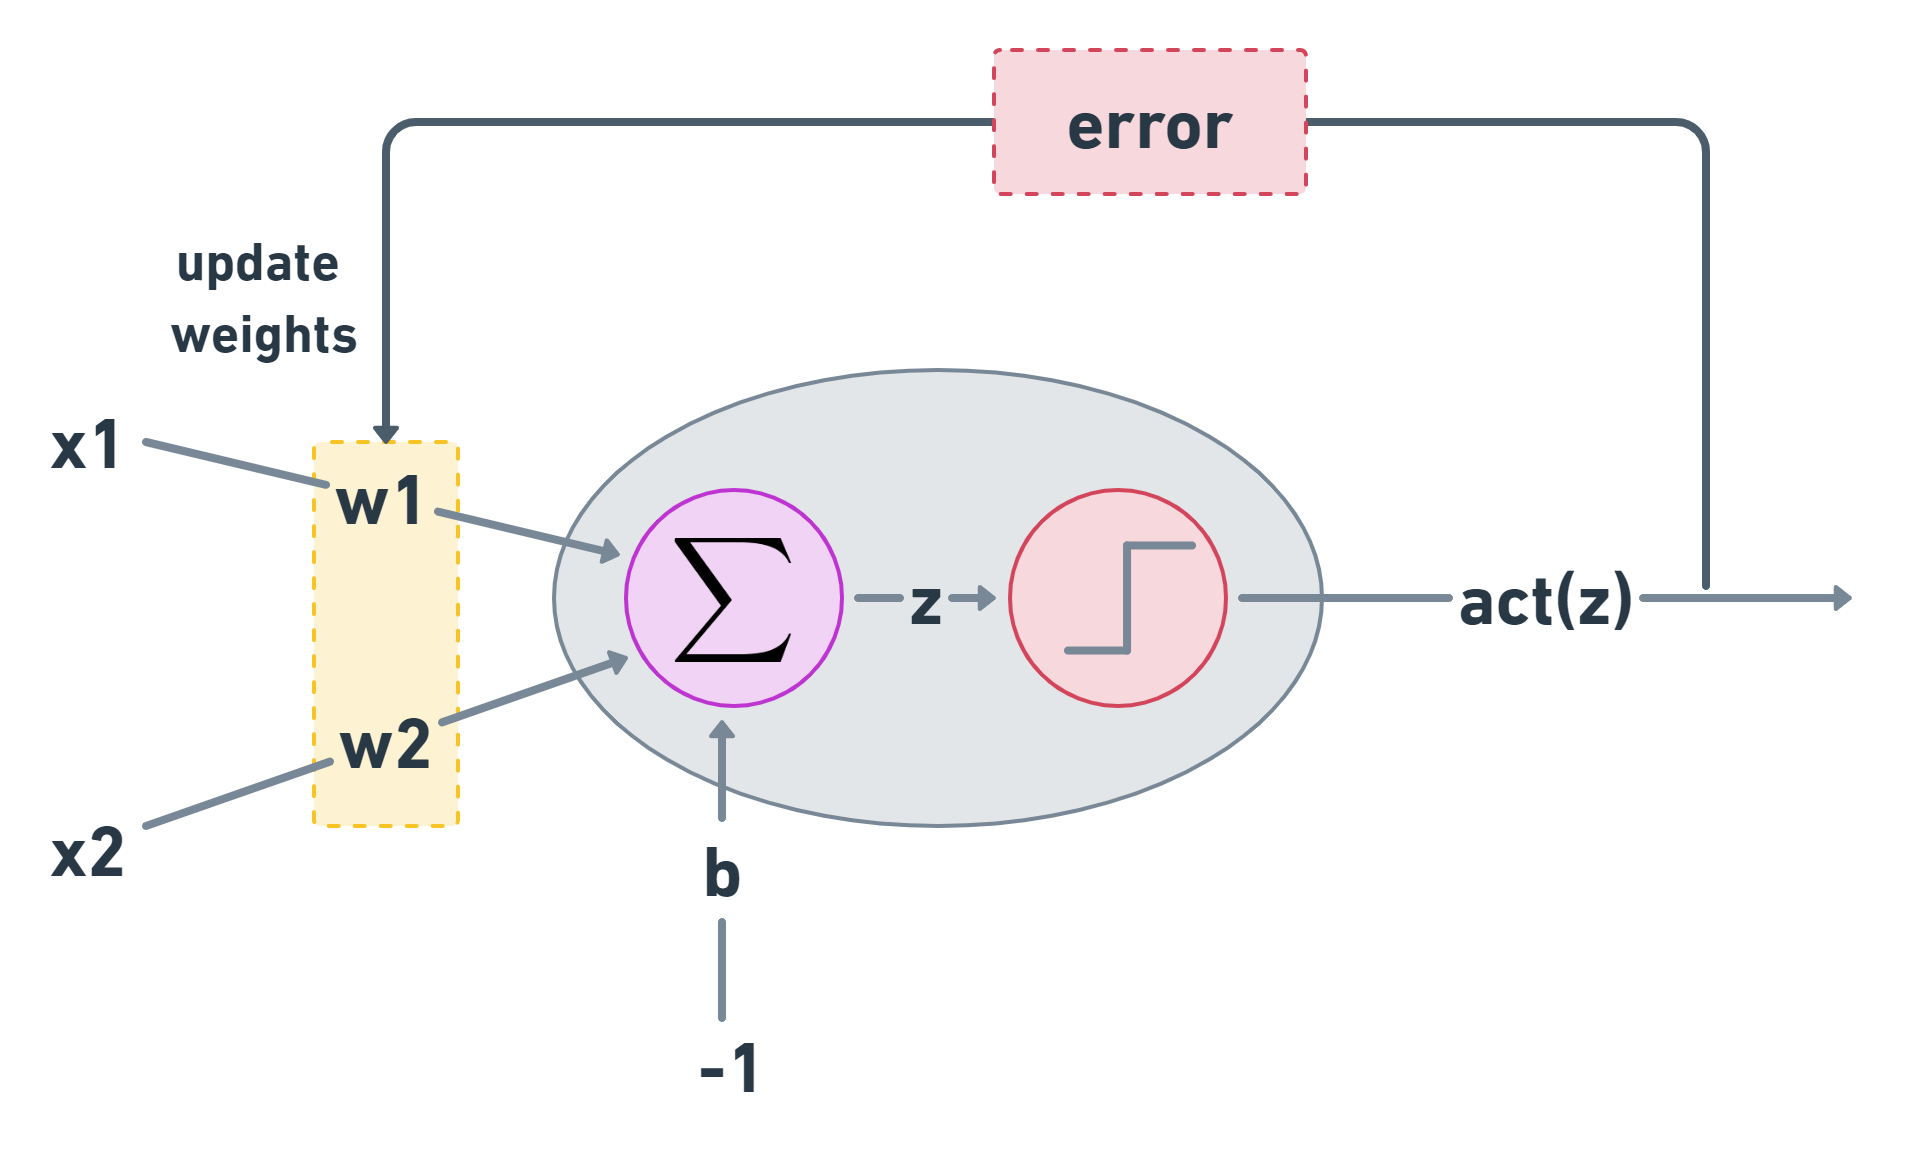

In [4]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        self.weights = np.random.randn(3) * 1e-4 # small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training: \n{self.weights}\n")
        self.eta = eta
        self.epochs = epochs
    
    def _z_outcome(self, inputs, weights):
        '''
        Returns the product
        '''
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
    
    def fit(self, X, y):
        '''
        Forward propagation
        '''
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            # updating weights
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
            
    
    def predict(self, X):
        '''
        Prediction
        '''
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        '''
        Calculating the total loss
        '''
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss
    
    def _create_dir_return_path(self, model_dir, filename):
        '''
        Creating directory
        '''
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)
    
    def save(self, filename, model_dir=None):
        """
        Saving the file
        """
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)
    
    def load(self, filepath):
        '''
        Loading the model
        '''
        return joblib.load(filepath)

In [9]:
def prepare_data(df, target_col="y"):
    '''
    Preparing data for model
    '''
    X = df.drop(target_col, axis=1)
    
    y = df[target_col]
    
    return X, y 

In [5]:
## AND GATE Data

AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,0,0,1]
}

df_AND = pd.DataFrame(AND)

df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [10]:
## 

X, y = prepare_data(df_AND)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_and = Perceptron(eta=ETA, epochs=EPOCHS)    # Creating object of Perceptron class
model_and.fit(X, y)                              # Fitting model  

_ = model_and.total_loss()    #Dummy variable

initial weights before training: 
[ 9.12069620e-05 -1.25617906e-04  9.42767013e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.10009121  0.09987438 -0.09990572]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 9.12069620e-05 -1.25617906e-04  2.00094277e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[0.10009121 0.09987438 0.10009428]
####################
--------------------
for epoch >> 3
--------------------
pre

In [11]:
## Saving model

model_and.save(filename="and.model")

In [12]:
# Loading model

reload_model_and = Perceptron().load(filepath="model/and.model")

In [13]:
reload_model_and.predict(X=[[1,1]])

array([1])

In [14]:
## OR GATE data

OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,1]
}

df_OR = pd.DataFrame(OR)

df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [15]:
## Claculating OR_GATE

X, y = prepare_data(df_OR)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(X, y)

_ = model_or.total_loss()

initial weights before training: 
[1.21855435e-04 2.00825488e-06 1.52543885e-04]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.20012186  0.20000201 -0.29984746]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 0.20012186  0.20000201 -0.19984746]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.20012186  0.20000201 -0.09984746]
####################
--------------------
for epoch >> 3
--------------------
predicted value

In [16]:
## Saving model

model_or.save(filename="or.model", model_dir="model_or")

In [18]:
## XOR GATE data

XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)

df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [19]:
## Calculating XOR GATE

X, y = prepare_data(df_XOR)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_xor = Perceptron(eta=ETA, epochs=EPOCHS)
model_xor.fit(X, y)

_ = model_xor.total_loss()

initial weights before training: 
[ 9.37669733e-05 -6.04336144e-05  1.51208262e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 0 1 1]
error: 
0    0
1    1
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[-9.99062330e-02 -6.04336144e-05  1.51208262e-05]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 9.37669733e-05  9.99395664e-02 -1.99984879e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[-9.99062330e-02 -6.04336144e-05  1.51208262e-05]
####################
--------------------
for epoch >>

In [20]:
## Saving model

model_or.save(filename="model_xor", model_dir="model_xor")

In [21]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    """
    Saving the plot 
    """
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),   # resolution for continuous graph
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

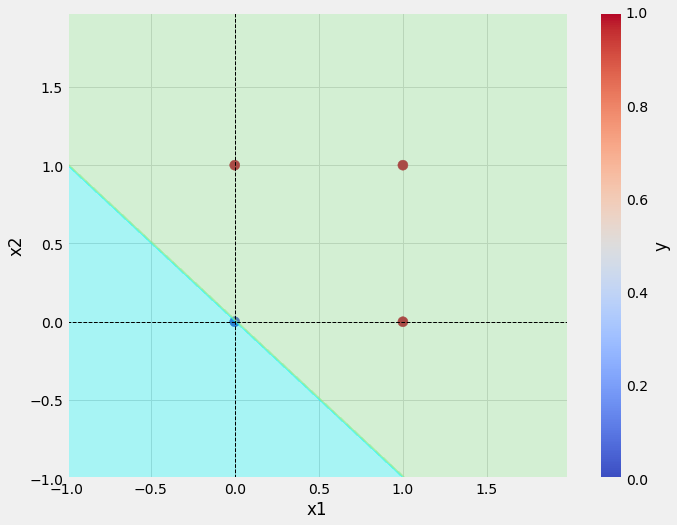

In [22]:
# Graph for OR model

save_plot(df_OR, model_or, filename="or.png")

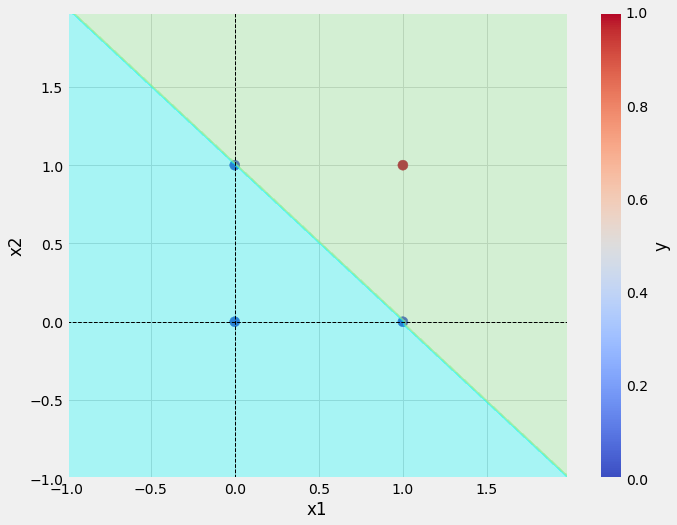

In [23]:
# Graph for AND model

save_plot(df_AND, model_and, filename="and.png")

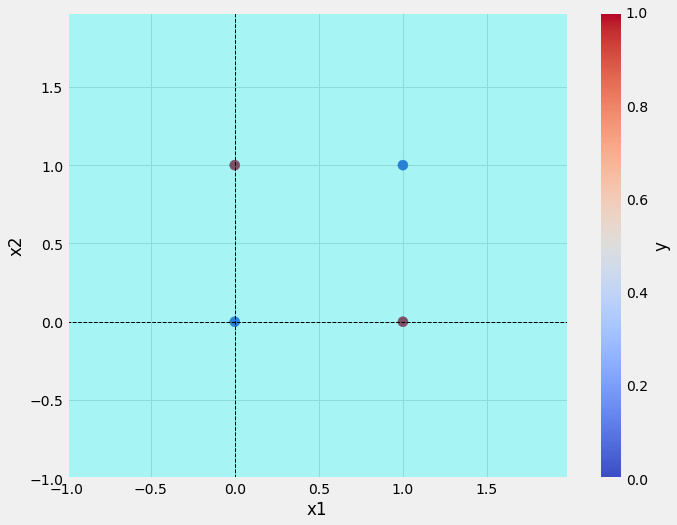

In [24]:
# Graph for XOR model

save_plot(df_XOR, model_xor, filename="xor.png")